# Exploratory  Data Analysis & Logistic Regression Classification Model

**Objective** :

This project aims at building a complete data science project which analyzes the listing of consumer complaints filed against Insurance companies licensed in Connecticut. This dataset includes the Company, Line of Business, nature of complaint, outcome or resolution, and recovery.

This application can be used by any agency, Insurance industry stakeholders, or the general public to predict the status of consumer filings against the insurance companies.

This is a complete data-driven application that considers the existing data to predict the Status of the Consumer complaints.

##### Importing necessary libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Reading the dataframe

In [111]:
df=pd.read_csv("Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv")
df.head()

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,Cigna Health and Life Insurance Company,7015934,07/11/2018,08/13/2018,Group,Health Only,Marketing & Sales,Misrepresentation,Claim Settled,Furnished Information,0.00,Closed
1,Cigna Health and Life Insurance Company,7013129,02/22/2019,03/18/2019,Individual,Dental,Claim Handling,Unsatisfactory Settlement/Offer,Company Position Substantiated,Furnished Information,0.00,Closed
2,Cigna Health and Life Insurance Company,7014049,01/25/2019,02/22/2019,Group,Health Only,Claim Handling,Delays,Claim Settled,Justified,593.37,Closed
3,Cigna Health and Life Insurance Company,7013857,01/23/2019,01/23/2019,Group,Health Only,Claim Handling,UR Case Management,NaN,Furnished Information,0.00,Closed
4,Cigna Health and Life Insurance Company,7013857,01/23/2019,01/23/2019,Group,Health Only,Claim Handling,UR Case Management,NaN,Refer-Judicial/Attorney,0.00,Closed


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24842 entries, 0 to 24841
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      24842 non-null  object 
 1   File No.     24842 non-null  int64  
 2   Opened       24842 non-null  object 
 3   Closed       23989 non-null  object 
 4   Coverage     22994 non-null  object 
 5   SubCoverage  17880 non-null  object 
 6   Reason       22637 non-null  object 
 7   SubReason    22637 non-null  object 
 8   Disposition  15505 non-null  object 
 9   Conclusion   21215 non-null  object 
 10  Recovery     24842 non-null  float64
 11  Status       24842 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.3+ MB


##### Displaying Unique values in respective columns 

In [113]:
df.nunique()

Company          709
File No.       15800
Opened          1234
Closed          1100
Coverage          43
SubCoverage       87
Reason             4
SubReason        147
Disposition       10
Conclusion        48
Recovery        2044
Status            22
dtype: int64

Inferences:

We can see that the columns Company, File No. has 709, 15800 unique values respectively

In [114]:
#printing the shape of the dataframe
print(df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

(24842, 12)
Number of rows: 24842
Number of columns: 12


#### Null Values in Dataset

In [115]:
#Displaying null values in the dataset with respect to the columns
df.isna().sum()

Company           0
File No.          0
Opened            0
Closed          853
Coverage       1848
SubCoverage    6962
Reason         2205
SubReason      2205
Disposition    9337
Conclusion     3627
Recovery          0
Status            0
dtype: int64

Inferences: 

The columns Closed, Coverage, Sub Coverage has 853, 1848, 6962 null values respectively.

#### Imputing Null Values in the dataset

In [116]:
df.fillna(df['Closed'].mode()[0], inplace=True)
df.fillna(df['Coverage'].mode()[0], inplace=True)
df.fillna(df['SubCoverage'].mode()[0], inplace=True)
df.fillna(df['Reason'].mode()[0], inplace=True)
df.fillna(df['SubReason'].mode()[0], inplace=True)
df.fillna(df['Disposition'].mode()[0], inplace=True)
df.fillna(df['Conclusion'].mode()[0], inplace=True)

#### Mapping various intermediate Status types to Open/pending and others to closed in Status Column 

In [117]:
df["Status"] = np.where(df["Status"] == "Closed", 0, 1)
df['Status'] = df['Status'].map({1:'Open/Pending', 0:'Closed'})

In [118]:
df = df[df.Reason != '02/23/2022']
df = df[df.Coverage != '02/23/2022']
df = df[df.SubCoverage != '02/23/2022']
df = df[df.Disposition != '02/23/2022']
df = df[df.Conclusion != '02/23/2022']

##### Summary of numerical columns

In [119]:
#Displaying summary of numerical columns
df.describe()

,File No.,Recovery
count,1.126600e+04,11266.000000
mean,7.017677e+06,985.167081
std,1.376488e+04,9247.913518
min,7.000002e+06,0.000000
25%,7.007318e+06,0.000000
50%,7.014266e+06,0.000000
75%,7.020789e+06,0.000000
max,7.045700e+06,311596.730000


Inferences: 
    
We can see that the values in Recovery column  is 80. The recoveries are ranging from 0 to $843825.

In [120]:
#Displaying the description of all columns
df.describe(include = 'all')

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
count,11266,1.126600e+04,11266,11266,11266,11266,11266,11266,11266,11266,11266.000000,11266
unique,478,NaN,1156,1093,23,69,4,120,10,43,NaN,2
top,"Anthem Health Plans, Inc",NaN,06/21/2019,02/23/2022,Private Passenger,Liability,Claim Handling,Denial of Claim,Company Position Substantiated,Unjustified,NaN,Closed
freq,1251,NaN,58,92,3475,2201,8770,1916,4891,4604,NaN,11178
mean,NaN,7.017677e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,985.167081,NaN
std,NaN,1.376488e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9247.913518,NaN
min,NaN,7.000002e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,7.007318e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,7.014266e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,7.020789e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


Inferences: 

The statistics of all the columns are displayed.

###### Displaying Complaints filed by Year

In [121]:
df['Filed_Year']=pd.to_datetime(df['Opened']).dt.year
df['Filed_Month']=pd.to_datetime(df['Opened']).dt.month
df['Settled_Year']=pd.to_datetime(df['Closed']).dt.year
df['Settled_Month']=pd.to_datetime(df['Closed']).dt.month

Text(0, 0.5, 'Count')

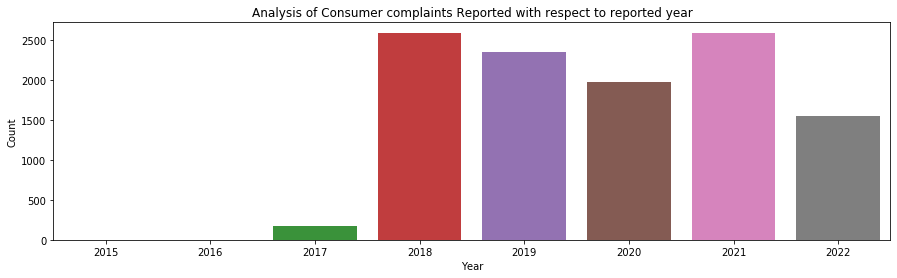

In [122]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="Filed_Year")
plt.title('Analysis of Consumer complaints Reported with respect to reported year')
plt.xlabel('Year')
plt.ylabel('Count')

Inferences: 

2021, 2018 are the years with most consumer complaints reported.

###### Displaying Complaints filed by Month

Text(0, 0.5, 'Count')

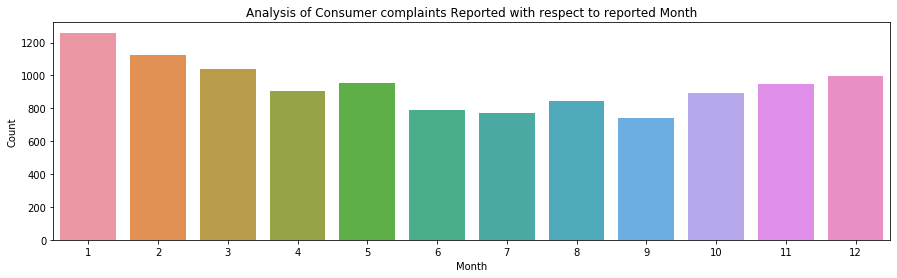

In [123]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="Filed_Month")
plt.title('Analysis of Consumer complaints Reported with respect to reported Month')
plt.xlabel('Month')
plt.ylabel('Count')

Inferences: 

January is month with most consumer complaints reported.

###### Displaying Complaints filed by Resolved Year

Text(0, 0.5, 'Count')

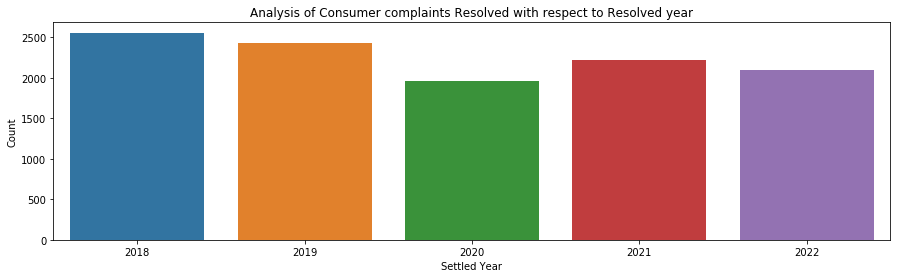

In [124]:
df['Settled_Year'] = df['Settled_Year'].astype(int)
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="Settled_Year")
plt.title('Analysis of Consumer complaints Resolved with respect to Resolved year')
plt.xlabel('Settled Year')
plt.ylabel('Count')


Inferences: 

2018, 2021 are the years with most consumer complaints settled/resolved.

###### Displaying Complaints filed by Resolved Month

Text(0, 0.5, 'Count')

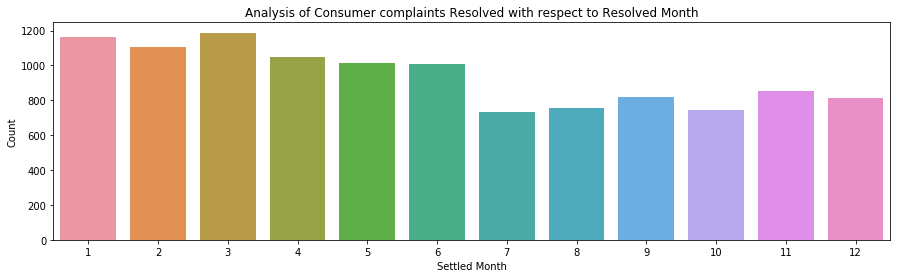

In [125]:
df['Settled_Month'] = df['Settled_Month'].astype(int)
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="Settled_Month")
plt.title('Analysis of Consumer complaints Resolved with respect to Resolved Month')
plt.xlabel('Settled Month')
plt.ylabel('Count')


Inferences: 

March, January are the months with most consumer complaints resolved.

##### Plotting the bar garph for Coverage Type and its individual counts

Text(0, 0.5, 'Count')

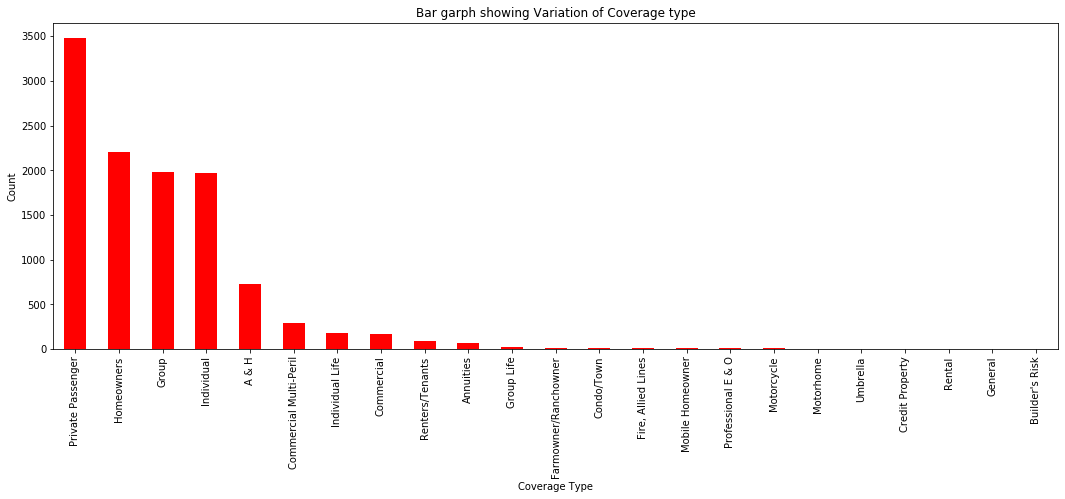

In [126]:
plt.figure(figsize=(18,6))
df['Coverage'].value_counts().plot(kind='bar', color='r')
plt.title('Bar garph showing Variation of Coverage type')
plt.xlabel('Coverage Type')
plt.ylabel('Count')

Inferences: 

Travel Insurances and Home insurances are the most sought after insurance policies.

##### Plotting the bar garph for Disposition Types

Text(0, 0.5, 'Count')

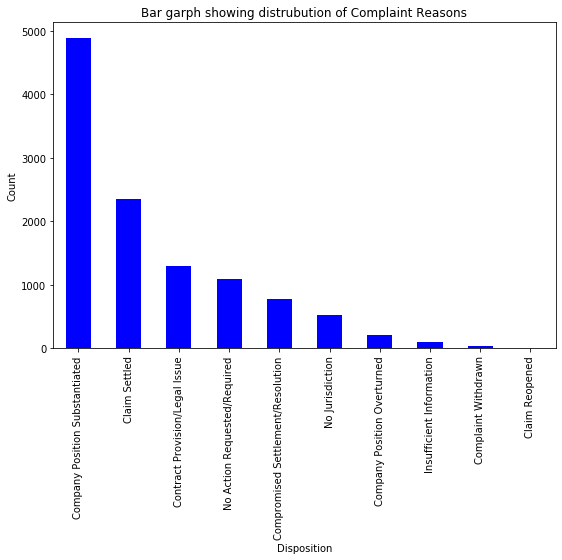

In [127]:
plt.figure(figsize=(9,6))
df['Disposition'].value_counts().plot(kind='bar', color='b')
plt.title('Bar garph showing distrubution of Complaint Reasons')
plt.xlabel('Disposition')
plt.ylabel('Count')

Inferences:
    
We can see that the disposition type Company Position Substantiated has the highest values in the dataset

##### Plotting the bar garph for Claim Reasons

Text(0, 0.5, 'Count')

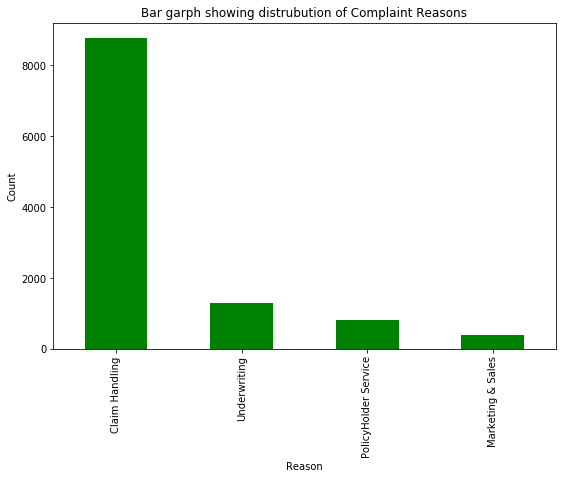

In [128]:
plt.figure(figsize=(9,6))
df['Reason'].value_counts().plot(kind='bar', color='g')
plt.title('Bar garph showing distrubution of Complaint Reasons')
plt.xlabel('Reason')
plt.ylabel('Count')

Inferences: 

The improper claim settlemets are the primary reason for complaint filings.

##### Depicting the reasons and their percent of share in complaint filings

Text(0.5, 1.0, 'Bar garph showing distrubution of Complaint Reasons')

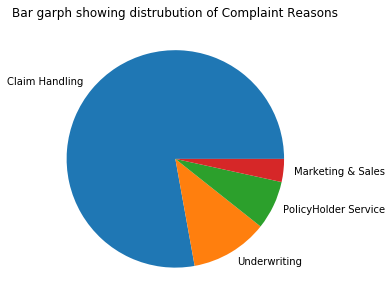

In [129]:
status_counts=df.Reason.value_counts()
plt.figure(figsize=(10,5))
plt.pie(status_counts,labels=status_counts.index);
plt.title('Bar garph showing distrubution of Complaint Reasons')


Inferences: 

The improper claim settlemets are the primary reason for complaint filings.

##### Plottings the variation of Complaint status vs Filed Year.

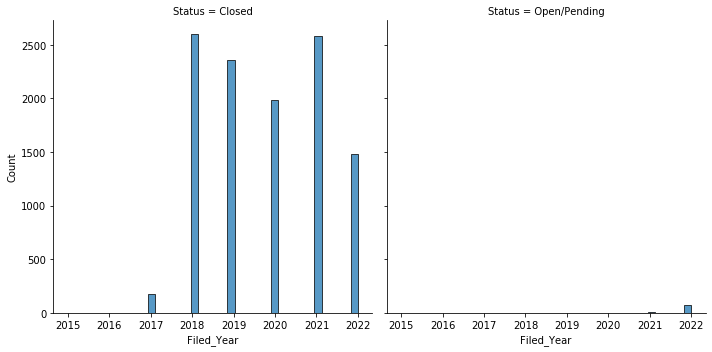

In [130]:
sns.displot(df, x="Filed_Year", col="Status")


Inferences: 

2021 is the year with most complaints filed and 2022 is the year with most of them resolved.

##### Plotting the variation in Reasons vs recovered amounts

Text(0.5, 1.0, 'Bar garph showing the variation in Reasons vs recovered amounts')

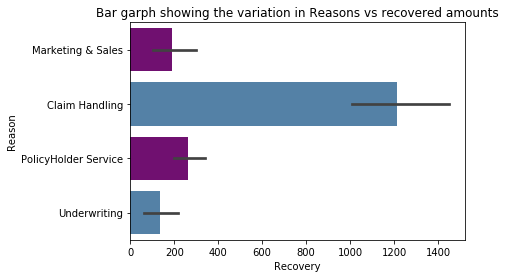

In [131]:
sns.barplot(x='Recovery', y='Reason', data=df,
            palette=['purple', 'steelblue'])
plt.title('Bar garph showing the variation in Reasons vs recovered amounts')


Inferences: 

Claim handling segment is the most highest segmnet with high recovery amounts then followed by complaints due to marketing and sales segments.

##### Graph showing the variations of Recovey Amounts with respect to Reported_Year

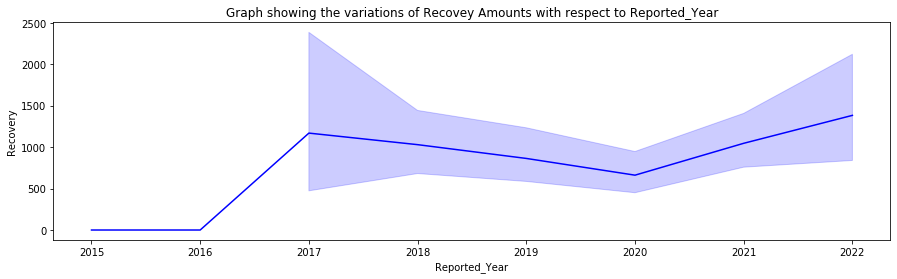

In [132]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Filed_Year',y='Recovery', data =df, color = 'b')
plt.title("Graph showing the variations of Recovey Amounts with respect to Reported_Year")
plt.xlabel("Reported_Year")
plt.show()

Inferences: 

2018 is the year with highest sum of claims recovered.

##### Graph showing the variations of Recovey Amounts with respect to Reported_Month

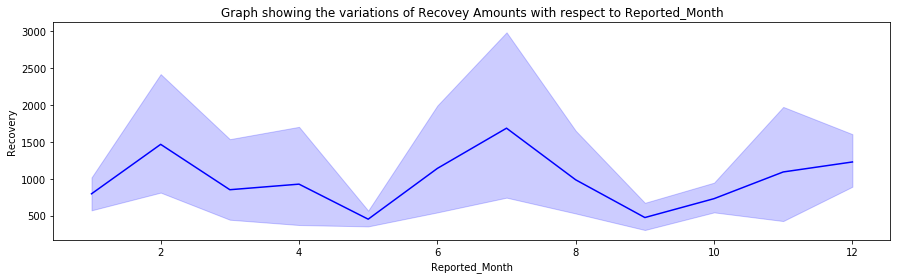

In [133]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Filed_Month',y='Recovery', data =df, color = 'b')
plt.title("Graph showing the variations of Recovey Amounts with respect to Reported_Month")
plt.xlabel("Reported_Month")
plt.show()

Inferences: 

February is the Month with highest sum of claims recovered.

##### Graph showing the distribution of Recovery amounts

Text(0.5, 1.0, 'Graph showing the distribution of Recovery amounts')

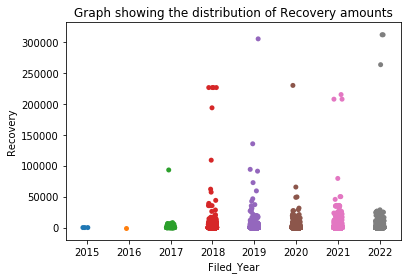

In [134]:
sns.stripplot(x='Filed_Year',y='Recovery',data=df)
plt.title('Graph showing the distribution of Recovery amounts')

##### Graph showing the variation if compaint status vs Recovery amounts and Reason filed

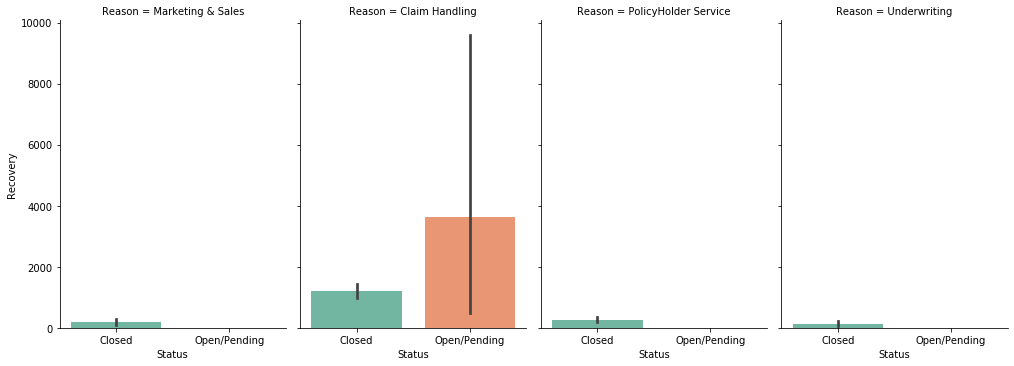

In [135]:
sns.catplot(x='Status',y='Recovery', col = 'Reason', data=df,kind='bar', aspect=.7, palette='Set2') 

Inferences: 
    
We can see that the most of the compaints are resolved with the highest recovery amounts in Claim handling category.

In [136]:
# Removing columns that are not used in our analysis.
df = df.drop('File No.', axis=1)
df = df.drop('Opened', axis=1)
df = df.drop('Closed', axis=1)

##### Coorelation matrix

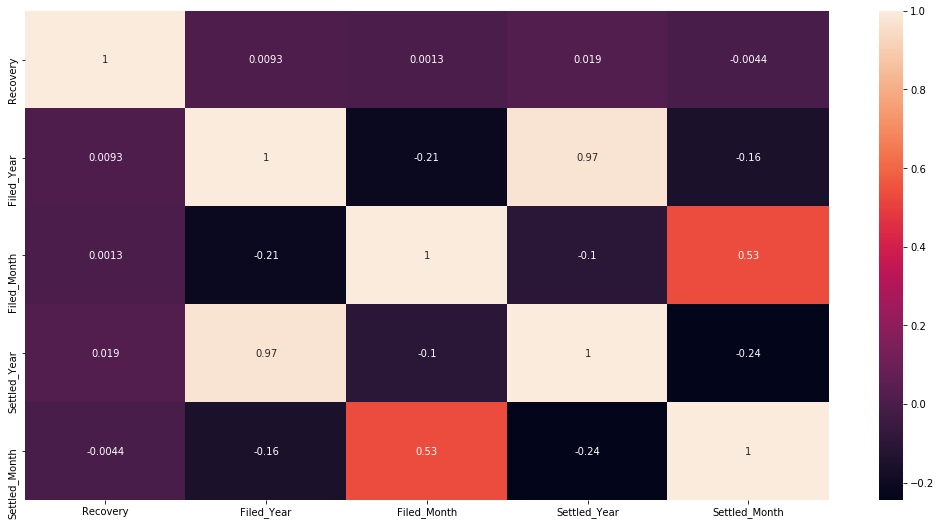

In [137]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True)

In [138]:
df = df[df.Reason != '02/23/2022']
df = df[df.Coverage != '02/23/2022']
df = df[df.SubCoverage != '02/23/2022']
df = df[df.Disposition != '02/23/2022']
df = df[df.Conclusion != '02/23/2022']

In [139]:
df['Company'].value_counts()[:25].index.tolist()

['Anthem Health Plans, Inc',
 'ConnectiCare Insurance Company, Inc',
 'UnitedHealthcare Insurance Company',
 'ConnectiCare Benefits, Inc.',
 'Progressive Direct Insurance Company',
 'Allstate Fire and Casualty Insurance Company',
 'Cigna Health and Life Insurance Company',
 'Progressive Casualty Insurance Company',
 'State Farm Fire & Casualty Company',
 'State Farm Mutual Automobile Insurance Company',
 'Oxford Health Plans (CT), Inc',
 'GEICO General Insurance Company',
 'Transamerica Life Insurance Company',
 'Allstate Insurance Company',
 'SAFECO Insurance Company of Illinois',
 'LM General Insurance Company',
 'GEICO Indemnity Company',
 'Brighthouse Life Insurance Company',
 'ConnectiCare Inc',
 'Travelers Home and Marine Insurance Company (The)',
 'Genworth Life Insurance Company',
 'American Commerce Insurance Company',
 'Metropolitan Life Insurance Company',
 'USAA Casualty Insurance Company',
 'Standard Fire Insurance Company (The)']

##### Data Cleaning : Removing unwanted data from the dataframe

In [140]:
df=df[np.isin(df.Company, ['Anthem Health Plans, Inc',
 'ConnectiCare Insurance Company, Inc',
 'UnitedHealthcare Insurance Company',
 'ConnectiCare Benefits, Inc.',
 'Progressive Direct Insurance Company',
 'Allstate Fire and Casualty Insurance Company',
 'Cigna Health and Life Insurance Company',
 'Progressive Casualty Insurance Company',
 'State Farm Fire & Casualty Company',
 'State Farm Mutual Automobile Insurance Company',
 'Oxford Health Plans (CT), Inc',
 'GEICO General Insurance Company',
 'Transamerica Life Insurance Company',
 'Allstate Insurance Company',
 'SAFECO Insurance Company of Illinois',
 'LM General Insurance Company',
 'Brighthouse Life Insurance Company',
 'GEICO Indemnity Company',
 'ConnectiCare Inc',
 'Travelers Home and Marine Insurance Company (The)',
 'Genworth Life Insurance Company',
 'American Commerce Insurance Company',
 'Metropolitan Life Insurance Company',
 'USAA Casualty Insurance Company',
 'Standard Fire Insurance Company (The)'])]

### Feature Engineering & Feature Selection 

##### Treating & Outliers Removal

Outlier: A data point in a data set that is far from all other observations is known as an outlier.

Outliers can be treated using 

1.Using boxplots

2.Using scatter plots

3.Using Z score

4.Using the IQR interquartile range

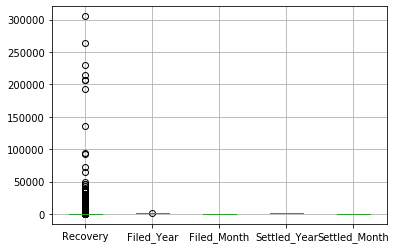

In [141]:
boxplot = df.boxplot()  

Here, We employ IQR interquartile range method to detect outliers. The outliers can be seen in above box graph. IQR is the first quartile subtracted from the third quartile. Anything that lies above or below the IQR is an outlier

In [142]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [143]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

##### One-hot encoding

One hot encoding, which improves predictions and classification accuracy of a model, is the crucial process of changing the categorical data variables into Numeric variables which are further fed to machine and deep learning algorithms.

In [144]:
df['Status'] = df['Status'].map({'Open/Pending':1, 'Closed':0})
df = pd.get_dummies(df, drop_first=True)
df

,Recovery,Status,Filed_Year,Filed_Month,Settled_Year,Settled_Month,Company_Allstate Insurance Company,Company_American Commerce Insurance Company,"Company_Anthem Health Plans, Inc",Company_Brighthouse Life Insurance Company,...,Conclusion_Policy not written in CT,Conclusion_Questionable,Conclusion_Rate Increase Explained,Conclusion_Record Only,Conclusion_Refer To Appraisal,Conclusion_Refer-Judicial/Attorney,Conclusion_Satisfactory Explanation,Conclusion_Satisfied,Conclusion_Unjustified,Conclusion_Voluntary Reconsideration
0,0.0,0,2018,7,2018,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,2019,2,2019,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.0,0,2019,1,2019,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0,2018,8,2019,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0,2019,11,2019,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24793,0.0,0,2022,6,2022,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24814,0.0,0,2022,6,2022,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24821,0.0,0,2022,6,2022,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24822,0.0,0,2022,4,2022,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##### Feature scaling

Feature Scaling is primarily used because to reduce the variance effect and to overcome the fitting problem. There are two types of feature scaling techniques. 

1. Standardization


2. Normalisation

In standardization, the mean of the features is 0 and the standard deviation is 1.

In [145]:
from sklearn import preprocessing
scaling=preprocessing.StandardScaler()
df1=scaling.fit_transform(df)

In [146]:
df_col=df.columns
df_col

Index(['Recovery', 'Status', 'Filed_Year', 'Filed_Month', 'Settled_Year',
       'Settled_Month', 'Company_Allstate Insurance Company',
       'Company_American Commerce Insurance Company',
       'Company_Anthem Health Plans, Inc',
       'Company_Brighthouse Life Insurance Company',
       ...
       'Conclusion_Policy not written in CT', 'Conclusion_Questionable',
       'Conclusion_Rate Increase Explained', 'Conclusion_Record Only',
       'Conclusion_Refer To Appraisal', 'Conclusion_Refer-Judicial/Attorney',
       'Conclusion_Satisfactory Explanation', 'Conclusion_Satisfied',
       'Conclusion_Unjustified', 'Conclusion_Voluntary Reconsideration'],
      dtype='object', length=236)

In [147]:
df1=pd.DataFrame(df, columns=df_col)
df1

,Recovery,Status,Filed_Year,Filed_Month,Settled_Year,Settled_Month,Company_Allstate Insurance Company,Company_American Commerce Insurance Company,"Company_Anthem Health Plans, Inc",Company_Brighthouse Life Insurance Company,...,Conclusion_Policy not written in CT,Conclusion_Questionable,Conclusion_Rate Increase Explained,Conclusion_Record Only,Conclusion_Refer To Appraisal,Conclusion_Refer-Judicial/Attorney,Conclusion_Satisfactory Explanation,Conclusion_Satisfied,Conclusion_Unjustified,Conclusion_Voluntary Reconsideration
0,0.0,0,2018,7,2018,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,2019,2,2019,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.0,0,2019,1,2019,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0,2018,8,2019,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0,2019,11,2019,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24793,0.0,0,2022,6,2022,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24814,0.0,0,2022,6,2022,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24821,0.0,0,2022,6,2022,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24822,0.0,0,2022,4,2022,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
